In [201]:
# !pip install sklearn
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

import sklearn

2.3.0


In [202]:
data_x,data_y = sklearn.datasets.load_breast_cancer(return_X_y=True)
print(data_x[0].shape)
print(data_y.shape)
# print(data_y)

(30,)
(569,)


In [203]:
model = tf.keras.Sequential(name='nn_LogisticRegression')
# model.add(layers.Dense(5,input_dim=30,activation='linear'))
model.add(layers.Dense(1, activation='linear',
#  kernel_regularizer=regularizers.l2(0.001),
 input_shape=(30,)))
# model.add(layers.Dense(1))
#  kernel_regularizer=regularizers.l2(0.001)))
model.compile(optimizer='sgd',
 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "nn_LogisticRegression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [204]:
history = model.fit(data_x, data_y, batch_size=2, epochs=5, verbose=0)

In [205]:
print(history.history.keys())
print(history.history['loss'])
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[1539.308349609375, 779.1441040039062, 479.2145080566406, 546.4605712890625, 570.6305541992188]
[0.5922671556472778, 0.7592267394065857, 0.8014059662818909, 0.7644991278648376, 0.7873462438583374]


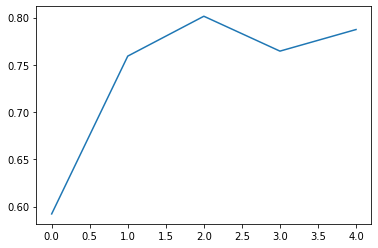

In [206]:
plt.plot(history.history['accuracy'])

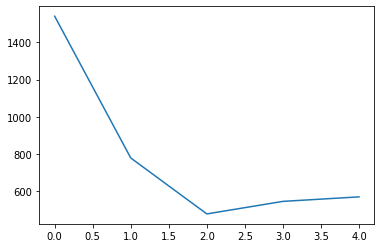

In [207]:
plt.plot(history.history['loss'])